In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

pd.set_option('Display.max_rows',None)
pd.set_option('display.max_columns', None)

In [2]:
#load data
weather_data = pd.read_csv("data\seattle-weather.csv")
weather_data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
data = weather_data.copy() #clone the data

data.shape  #check dataset dimension

(1461, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
#checking for nan values in the dataset
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

Data cleaning

In [6]:
data.rename(columns={"wind":"wind_speed", "weather":"weather_condition"}, inplace=True)

data.tail()

,date,precipitation,temp_max,temp_min,wind_speed,weather_condition
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [7]:
#calculating the dew point using relative humidty
relative_humidity = 0.7

data['dew_point'] = data[["temp_min", "temp_max"]].mean(axis=1)-((1 - relative_humidity) * 10)

data['dew_point'][:5]

0    5.90
1    3.70
2    6.45
3    5.90
4    2.85
Name: dew_point, dtype: float64

In [8]:
data['mean_temp'] = (data["temp_max"] + data["temp_min"])/2

data.drop(columns=['temp_max','temp_min'], inplace=True)

data['mean_temp'].value_counts()[:5]

mean_temp
9.45     34
6.65     22
9.15     22
10.00    21
5.00     21
Name: count, dtype: int64

In [9]:
#calculating the humdity 
data["humidity"] = 100 * (np.exp((17.27 * data["dew_point"]) / (237.7 + data["dew_point"]))
                        / np.exp((17.27 * data["mean_temp"])
                         / (237.7 + data["mean_temp"])))
data['humidity'][:5]

0    81.464018
1    81.160676
2    81.538756
3    81.464018
4    81.041565
Name: humidity, dtype: float64

Descriptive statistics

In [10]:
data.describe()

,precipitation,wind_speed,dew_point,mean_temp,humidity
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,3.241136,9.336927,12.336927,81.899304
std,6.680194,1.437825,5.998051,5.998051,0.789067
min,0.000000,0.400000,-6.800000,-3.800000,79.610178
25%,0.000000,2.200000,4.750000,7.750000,81.306336
50%,0.000000,3.000000,8.950000,11.950000,81.873072
75%,2.800000,4.000000,14.200000,17.200000,82.547334
max,55.900000,9.500000,23.700000,26.700000,83.678602


Exploratory Data Analysis

In [11]:
width = 15
height = 7

In [12]:

plt.figure(figsize=(width, height))

figure = px.line(data, x="date", y="humidity", title="Humidity in Seattle within this period")
figure.show()

<Figure size 1500x700 with 0 Axes>

In [13]:
figure = px.line(data, x="date", y="mean_temp", title = "Teamperature variation in Seattle within this period")
figure.show()

In [14]:
# sns.set_style("darkgrid")
# sns.set_palette("Set2")
# sns.countplot(x="date",hue="precipitation", errorbar = None, data=data,)
# plt.title("precipitation condition over certain period of time")

# plt.show()

In [15]:
figure = px.scatter(data, x="humidity", y="mean_temp",
                   trendline="ols", title="Relationship between temperature and humidity")
figure.show()

In [16]:
"""
    Analyzing Temperature Change.
    Now let’s analyze the temperature change in seattle over the years. 
    For this task, I will first convert the data type of the date column into datetime. 
    Then I will add two new columns in the dataset for year and month values.
"""
data["date"] = pd.to_datetime(data["date"], format = "%Y-%m-%d")
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month

data.head()

,date,precipitation,wind_speed,weather_condition,dew_point,mean_temp,humidity,year,month
0,2012-01-01,0.0,4.7,drizzle,5.90,8.90,81.464018,2012,1
1,2012-01-02,10.9,4.5,rain,3.70,6.70,81.160676,2012,1
2,2012-01-03,0.8,2.3,rain,6.45,9.45,81.538756,2012,1
3,2012-01-04,20.3,4.7,rain,5.90,8.90,81.464018,2012,1
4,2012-01-05,1.3,6.1,rain,2.85,5.85,81.041565,2012,1


In [17]:
figure = px.scatter(data, x="date", y="wind_speed", trendline="ols", title = "Scatterplot of Windspeed in Seattle within this period")
figure.show()

Corrrelation heatmap

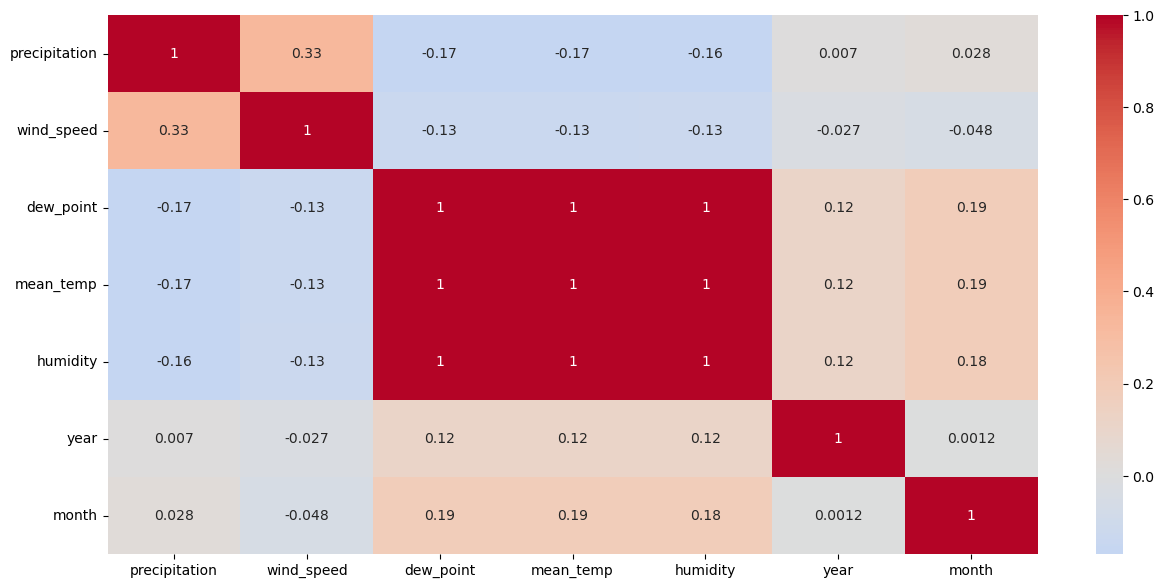

In [18]:
correlation = data.corr(numeric_only=True)

plt.figure(figsize=(15,7))
sns.heatmap(correlation, annot=True, fmt='.2g',cmap='coolwarm', center=0)

plt.show()

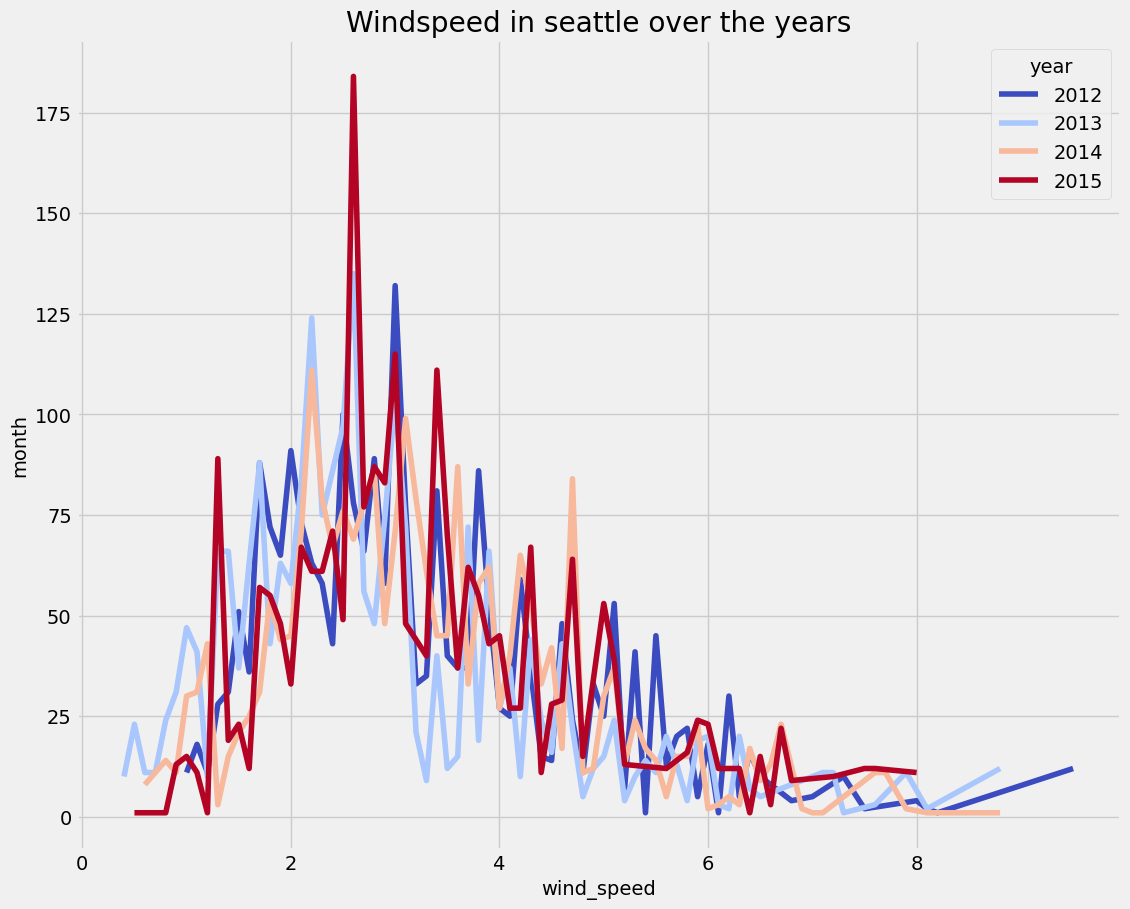

In [30]:
plt.figure(figsize=(12,10))
plt.style.use("fivethirtyeight")
plt.title("Windspeed in seattle over the years")

sns.lineplot(data=data, x="wind_speed", y="month", hue="year", estimator=sum ,errorbar=None, palette='coolwarm')
plt.show()

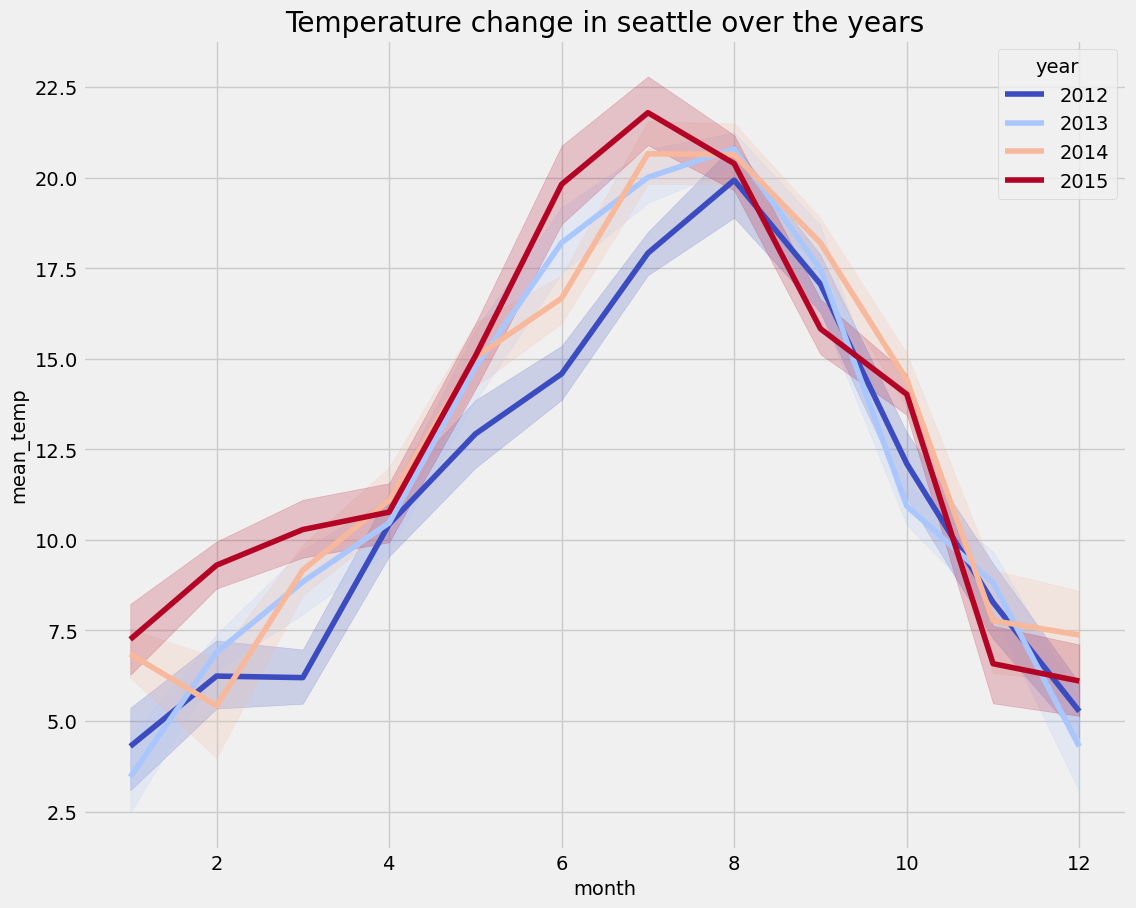

In [31]:
plt.figure(figsize=(12,10))
plt.style.use("fivethirtyeight")
plt.title("Temperature change in seattle over the years")

sns.lineplot(data=data, x="month", y="mean_temp", hue="year", palette='coolwarm')
plt.show()

<Axes: title={'center': 'Weather conditions in seattle over the years'}, xlabel='weather_condition', ylabel='count'>

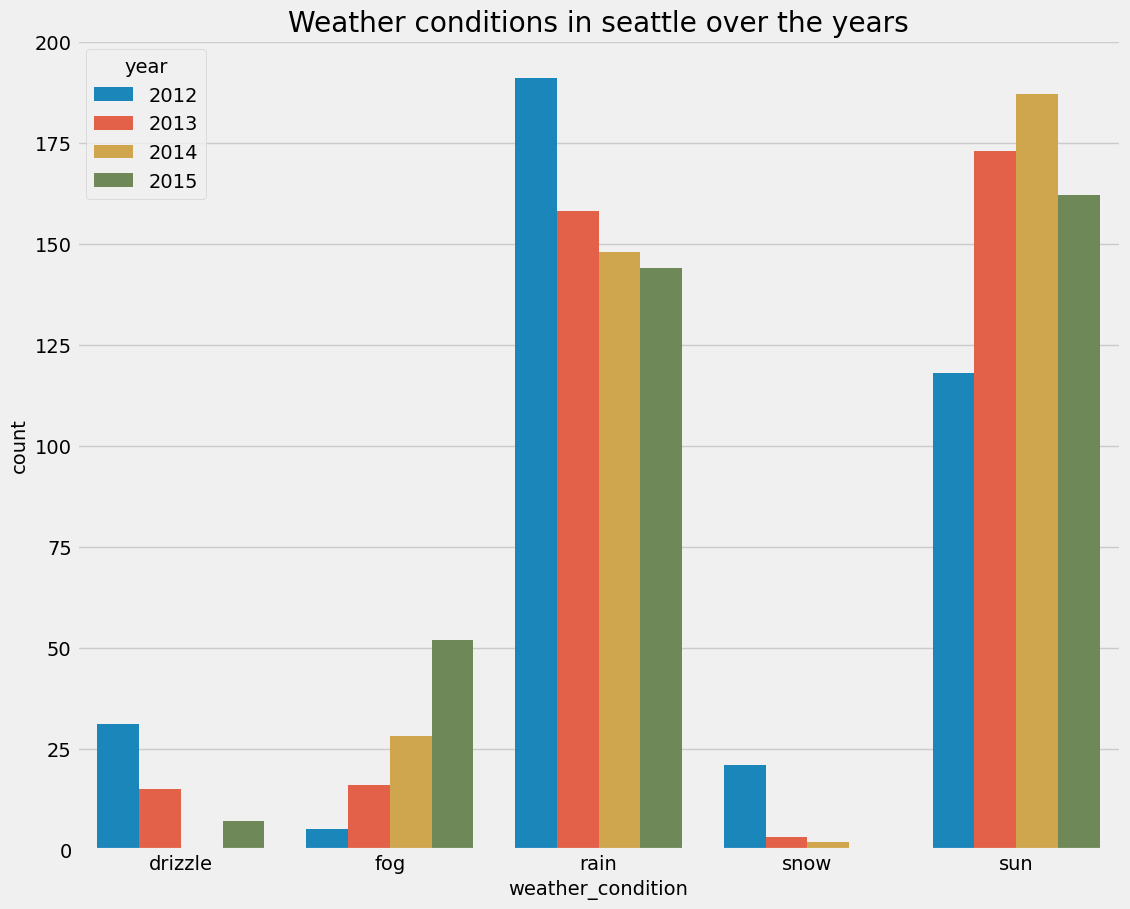

In [32]:
plt.figure(figsize=(12,10))
plt.style.use("fivethirtyeight")
plt.title("Weather conditions in seattle over the years")

counts = data.groupby(['weather_condition','year']).size().reset_index(name='count')
sns.barplot(data=counts, x='weather_condition', y='count', hue="year")

Forecasting weather using Python \
I will be using the Facebook prophet model for this task. The Facebook prophet model is one of the best techniques for `time series forecasting`. \
The prophet model accepts time data named as `ds`, and labels as `y`. So let’s convert the data into this format:

In [33]:
forecast_data = data.rename(columns = {"date":"ds", "mean_temp":"y"})
print(forecast_data)

             ds  precipitation  wind_speed weather_condition  dew_point   
0    2012-01-01            0.0         4.7           drizzle       5.90  \
1    2012-01-02           10.9         4.5              rain       3.70   
2    2012-01-03            0.8         2.3              rain       6.45   
3    2012-01-04           20.3         4.7              rain       5.90   
4    2012-01-05            1.3         6.1              rain       2.85   
5    2012-01-06            2.5         2.2              rain       0.30   
6    2012-01-07            0.0         2.3              rain       2.00   
7    2012-01-08            0.0         2.0               sun       3.40   
8    2012-01-09            4.3         3.4              rain       4.20   
9    2012-01-10            1.0         3.4              rain       0.35   
10   2012-01-11            0.0         5.1               sun      -0.50   
11   2012-01-12            0.0         1.9               sun      -0.80   
12   2012-01-13          

In [34]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model = Prophet()
model.fit(forecast_data)

forecasts = model.make_future_dataframe(periods=730)
prediction = model.predict(forecasts)

plot_plotly(model,prediction)

15:48:14 - cmdstanpy - INFO - Chain [1] start processing
15:48:15 - cmdstanpy - INFO - Chain [1] done processing


In [145]:
df_ml = data.copy() 
dummies = pd.get_dummies(data['weather_condition'])
df_ml = pd.concat([data], axis=1)
df_ml.head()

,date,precipitation,wind_speed,weather_condition,dew_point,mean_temp,humidity,year,month
0,2012-01-01,0.0,4.7,drizzle,5.90,8.90,81.464018,2012,1
1,2012-01-02,10.9,4.5,rain,3.70,6.70,81.160676,2012,1
2,2012-01-03,0.8,2.3,rain,6.45,9.45,81.538756,2012,1
3,2012-01-04,20.3,4.7,rain,5.90,8.90,81.464018,2012,1
4,2012-01-05,1.3,6.1,rain,2.85,5.85,81.041565,2012,1


In [162]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline
import pickle

import warnings
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [147]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1461 non-null   datetime64[ns]
 1   precipitation      1461 non-null   float64       
 2   wind_speed         1461 non-null   float64       
 3   weather_condition  1461 non-null   object        
 4   dew_point          1461 non-null   float64       
 5   mean_temp          1461 non-null   float64       
 6   humidity           1461 non-null   float64       
 7   year               1461 non-null   int32         
 8   month              1461 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(2), object(1)
memory usage: 91.4+ KB


Encoding categorical variables in the dataset

In [148]:
for col in df_ml.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(df_ml[col].unique())
    df_ml[col] = label_encoder.transform(df_ml[col])
    
    print(f"{col}: {df_ml[col].unique()}")

weather_condition: [0 2 4 3 1]


In [149]:
Features = df_ml.drop(columns=['weather_condition','date'], axis=1)
target = df_ml['weather_condition']

X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size=0.3, random_state=42)

print(f'The testing set {X_test.shape,y_test.shape}, and The training set {X_train.shape, y_train.shape}')

The testing set ((439, 7), (439,)), and The training set ((1022, 7), (1022,))


In [150]:
print(f'{y_test.value_counts()[:5]}')

weather_condition
4    193
2    192
1     32
0     14
3      8
Name: count, dtype: int64


In [151]:
#decision tree
dt = DecisionTreeClassifier(max_depth=10).fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree: {:.3f}'.format(accuracy_score(y_test, y_pred_dt)))

#random forest
rf = RandomForestClassifier(max_depth=10).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random forest:{:.3f}'.format(accuracy_score(y_test, y_pred_rf)))

#extra forest
ets = ExtraTreesClassifier(max_depth=10).fit(X_train, y_train)
y_pred_ets = ets.predict(X_test)
print('Extra Trees: {:.3f}'.format(accuracy_score(y_test, y_pred_ets)))

#knn
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('K Neighbor: {:.3f}'.format(accuracy_score(y_test, y_pred_knn)))

#xgb
xgb = XGBClassifier()

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.8,0.9,1.0],
    'gamma':[0,0.1,0.2],
    'min_child_weight':[1,2,3]
}
bayes_search = BayesSearchCV(xgb, param_grid, cv=5, error_score='raise')
bayes_search.fit(X_train, y_train)
best_xgb_params = bayes_search.best_params_

xgb = XGBClassifier(**best_xgb_params)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print('XG Boost: {:.3f}'.format(accuracy_score(y_test, y_pred_xgb)))


Decision Tree: 0.806
Random forest:0.847
Extra Trees: 0.772
K Neighbor: 0.708
XG Boost: 0.861


Model Evalauation

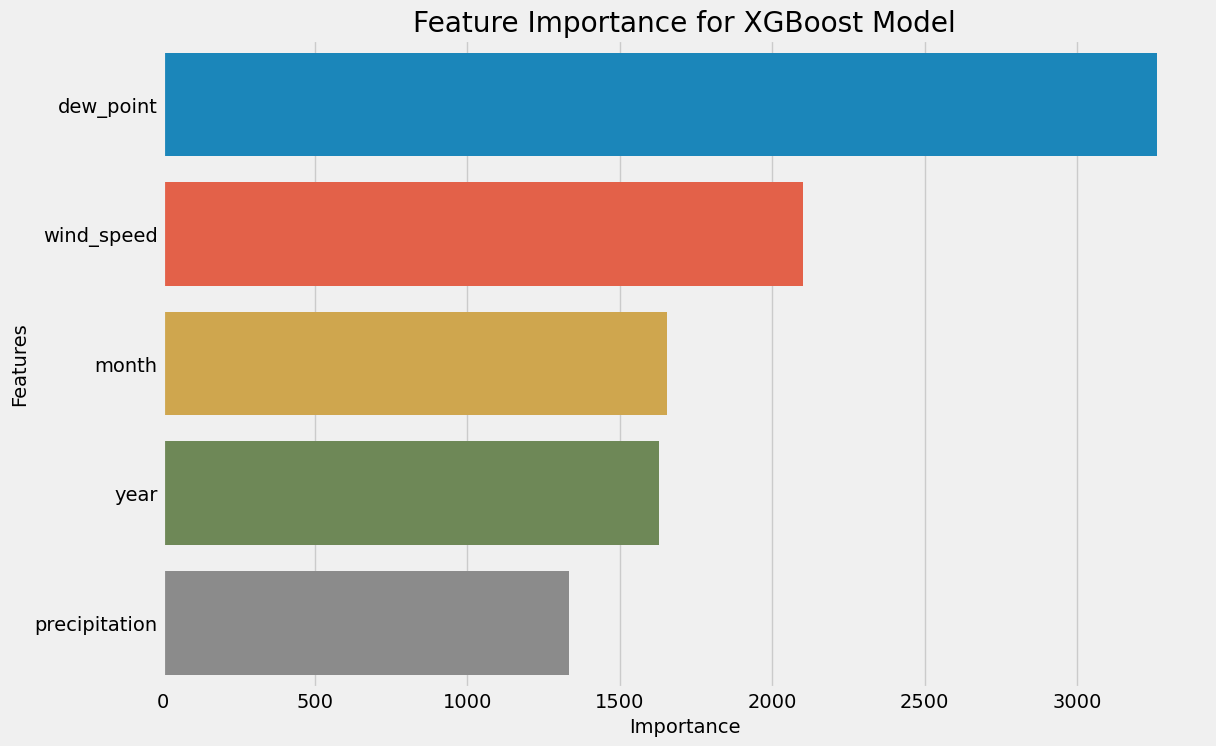

In [175]:
# Plotting feature importance from the XGBoost model
feature_importance = xgb.get_booster().get_score(importance_type='weight')

sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 8))
sns.barplot(x=list(sorted_feature_importance.values()), y=list(sorted_feature_importance.keys()),)
plt.title('Feature Importance for XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [155]:
pred_df = pd.DataFrame(y_pred_xgb,)
pred_df.index = y_test.index
pred_df.columns = ['Pred_weather_condition']

final = pd.DataFrame(X_test)
final['Actual_weather_condition'] = y_test
final['Pred_weather_condition'] = pred_df.idxmax(axis=1)
final['Is_Equal'] = (final['Actual_weather_condition'] == final['Pred_weather_condition'])
final = final.merge(df_ml[['date' ,'precipitation','wind_speed','dew_point','mean_temp','humidity','weather_condition']], left_index = True, right_index = True)

(439, 17)


KeyError: "['precipitation', 'wind_speed', 'dew_point', 'mean_temp', 'humidity'] not in index"

Index(['precipitation_x', 'wind_speed_x', 'dew_point_x', 'mean_temp_x',
       'humidity_x', 'year', 'month', 'Actual_weather_condition',
       'Pred_weather_condition', 'Is_Equal', 'date', 'precipitation_y',
       'wind_speed_y', 'dew_point_y', 'mean_temp_y', 'humidity_y',
       'weather_condition'],
      dtype='object')

,precipitation_x,wind_speed_x,dew_point_x,mean_temp_x,humidity_x,year,month,Actual_weather_condition,Pred_weather_condition,Is_Equal,date,precipitation_y,wind_speed_y,dew_point_y,mean_temp_y,humidity_y,weather_condition
892,0.0,2.7,14.50,17.50,82.584766,2014,6,4,Pred_weather_condition,False,2014-06-11,0.0,2.7,14.50,17.50,82.584766,4
1105,5.8,0.5,3.95,6.95,81.195504,2015,1,2,Pred_weather_condition,False,2015-01-10,5.8,0.5,3.95,6.95,81.195504,2
413,0.0,3.4,3.90,6.90,81.188546,2013,2,2,Pred_weather_condition,False,2013-02-17,0.0,3.4,3.90,6.90,81.188546,2
522,0.0,2.5,16.45,19.45,82.825270,2013,6,4,Pred_weather_condition,False,2013-06-06,0.0,2.5,16.45,19.45,82.825270,4
1036,1.8,2.9,7.25,10.25,81.646695,2014,11,2,Pred_weather_condition,False,2014-11-02,1.8,2.9,7.25,10.25,81.646695,2
